In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [11]:
df = pd.read_csv('logs.csv')

In [37]:
mapping = {"master-mini": 10_000_000, "master-small": 20_000_000, "master-medium": 50_000_000, "master-large": 100_000_000}
df["dataset_size"] = df["dataset"].map(mapping)
df["model"] = df["model"].str.upper()

In [40]:
unique_sizes = sorted(df["dataset_size"].unique())

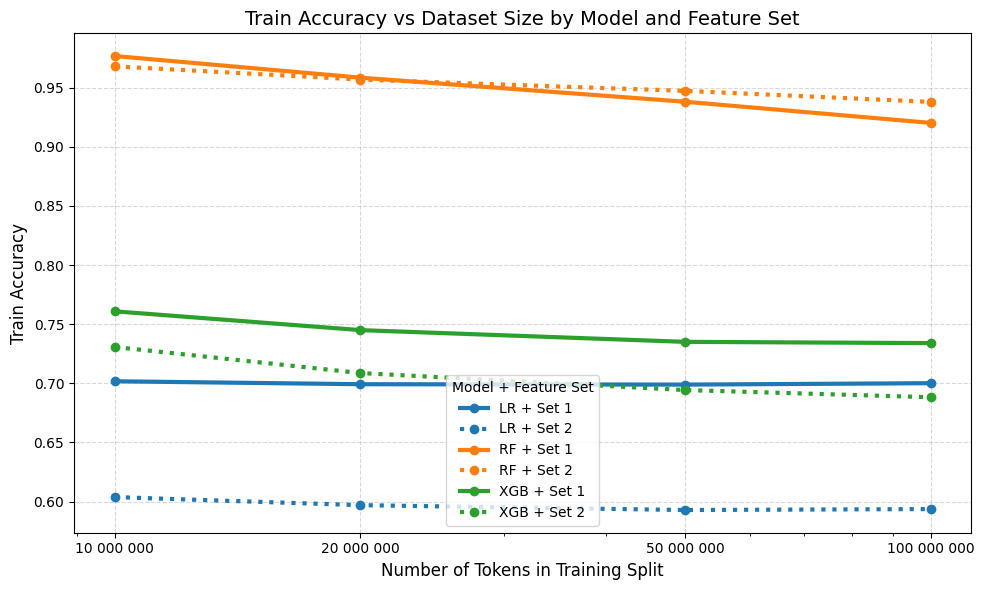

In [47]:
plt.figure(figsize=(10, 6))

# Define colors for each model
models = df['model'].unique()
colors = dict(zip(models, ['tab:blue', 'tab:orange', 'tab:green']))

# Plot each model-feature_set combination
for model in models:
    for feature_set in [1, 2]:
        subset = df[(df['model'] == model) & (df['feature_set'] == feature_set)]
        linestyle = '-' if feature_set == 1 else ':'
        label = f"{model} + Set {feature_set}"
        plt.plot(
            subset['dataset_size'],
            subset['train_accuracy'],
            label=label,
            color=colors[model],
            linestyle=linestyle,
            marker='o',
            linewidth=3
        )

plt.xscale('log')

def space_formatter(x, _):
    return f"{int(x):,}".replace(",", " ")

# Final plot formatting
plt.gca().xaxis.set_major_formatter(FuncFormatter(space_formatter))
plt.xticks(unique_sizes, labels=[space_formatter(size, None) for size in unique_sizes], fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of Tokens in Training Split', fontsize=12)

plt.ylabel('Train Accuracy', fontsize=12)
plt.title('Train Accuracy vs Dataset Size by Model and Feature Set', fontsize=14)
plt.legend(title='Model + Feature Set', fontsize=10, loc='lower center')
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.tight_layout()
plt.show()

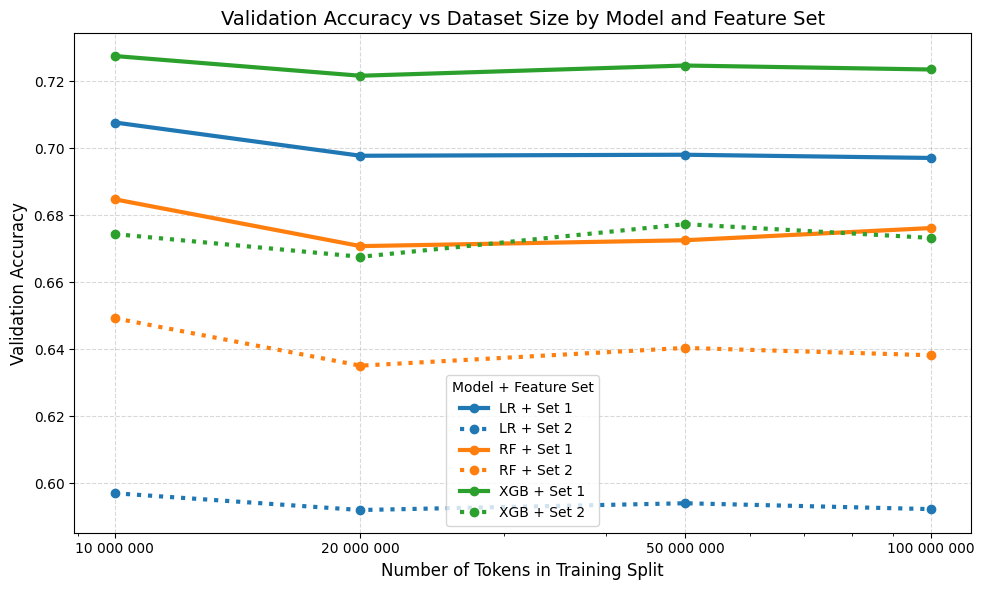

In [48]:
plt.figure(figsize=(10, 6))

# Define colors for each model
models = df['model'].unique()
colors = dict(zip(models, ['tab:blue', 'tab:orange', 'tab:green']))

# Plot each model-feature_set combination
for model in models:
    for feature_set in [1, 2]:
        subset = df[(df['model'] == model) & (df['feature_set'] == feature_set)]
        linestyle = '-' if feature_set == 1 else ':'
        label = f"{model} + Set {feature_set}"
        plt.plot(
            subset['dataset_size'],
            subset['val_accuracy'],
            label=label,
            color=colors[model],
            linestyle=linestyle,
            marker='o',
            linewidth=3
        )

plt.xscale('log')

def space_formatter(x, _):
    return f"{int(x):,}".replace(",", " ")

# Final plot formatting
plt.gca().xaxis.set_major_formatter(FuncFormatter(space_formatter))
plt.xticks(unique_sizes, labels=[space_formatter(size, None) for size in unique_sizes], fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of Tokens in Training Split', fontsize=12)

plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Validation Accuracy vs Dataset Size by Model and Feature Set', fontsize=14)
plt.legend(title='Model + Feature Set', fontsize=10, loc='lower center')
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.tight_layout()
plt.show()

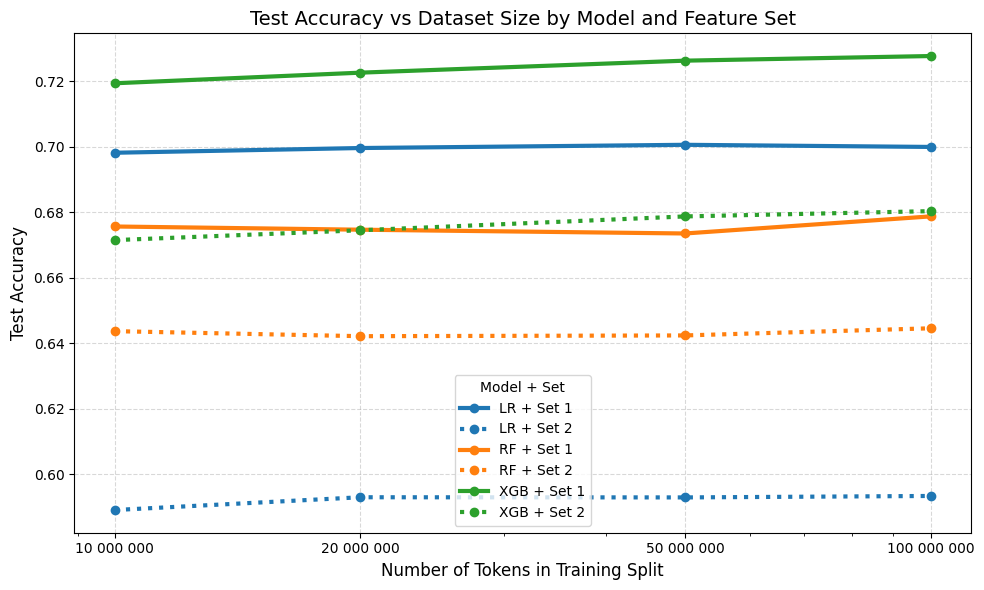

In [ ]:
plt.figure(figsize=(10, 6))

# Define colors for each model
models = df['model'].unique()
colors = dict(zip(models, ['tab:blue', 'tab:orange', 'tab:green']))

# Plot each model-feature_set combination
for model in models:
    for feature_set in [1, 2]:
        subset = df[(df['model'] == model) & (df['feature_set'] == feature_set)]
        linestyle = '-' if feature_set == 1 else ':'
        label = f"{model} + Set {feature_set}"
        plt.plot(
            subset['dataset_size'],
            subset['test_accuracy'],
            label=label,
            color=colors[model],
            linestyle=linestyle,
            marker='o',
            linewidth=3
        )

plt.xscale('log')

def space_formatter(x, _):
    return f"{int(x):,}".replace(",", " ")

# Final plot formatting
plt.gca().xaxis.set_major_formatter(FuncFormatter(space_formatter))
plt.xticks(unique_sizes, labels=[space_formatter(size, None) for size in unique_sizes], fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of Tokens in Training Split', fontsize=12)

plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Test Accuracy vs Dataset Size by Model and Feature Set', fontsize=14)
plt.legend(title='Model + Set', fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.tight_layout()
plt.show()

In [50]:
df[["model", "dataset", "feature_set", "test_accuracy", "test_balanced_accuracy", "test_recall", "test_precision", "test_f1", "test_auc"]]

,model,dataset,feature_set,test_accuracy,test_balanced_accuracy,test_recall,test_precision,test_f1,test_auc
0,LR,master-mini,1,0.698125,0.690830,0.777937,0.698976,0.736346,0.749424
1,RF,master-mini,1,0.675619,0.671501,0.720675,0.692973,0.706552,0.737384
2,XGB,master-mini,1,0.719332,0.716122,0.754443,0.734721,0.744451,0.787482
3,LR,master-small,1,0.699568,0.692818,0.773422,0.702298,0.736146,0.750833
4,RF,master-small,1,0.674640,0.670943,0.715086,0.693851,0.704309,0.735280
5,XGB,master-small,1,0.722570,0.720216,0.748318,0.741924,0.745107,0.792332
6,LR,master-medium,1,0.700550,0.694762,0.763871,0.707052,0.734364,0.750895
7,RF,master-medium,1,0.673486,0.670567,0.705416,0.696091,0.700723,0.736508
8,XGB,master-medium,1,0.726233,0.724819,0.741692,0.750240,0.745942,0.795770
9,LR,master-large,1,0.699901,0.694661,0.757229,0.708834,0.732233,0.749505
